# k-means法と行列分解のデモ

## 作成者：志賀元紀（岐阜大学）
 <p>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
# from libnmf import NMF, NMF_SO, NMF_ARD_SO

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA,  NMF, FastICA

# 人工データの生成

In [2]:
#Mn3O4 の EELSの理論計算スペクトル
mat_dict = sio.loadmat('mn3o4_f2.mat')
ximage = mat_dict['datar']
del(mat_dict)

# 注目するチャネルを指定し、一部のデータを取り出す
n_ch = np.arange(37-1,116);
ximage = ximage[:,:,n_ch];

# x軸、y軸、EELSチャネル軸方向のデータ点数
xdim, ydim, Nch = ximage.shape
print('Size of SI data:', end=' ')
print(ximage.shape)

#  理論計算値に観測雑音を加えてデータを生成する
X = np.reshape(ximage, (xdim*ydim, Nch)) #データキューブからデータ行列に変換
scale_spect = np.max(X)
s2_noise = 0.1  #雑音の分散
X = X + np.random.randn(xdim*ydim, Nch) * s2_noise * scale_spect   #加法ガウス雑音の付加
X = (X + np.abs(X))/2

Size of SI data: (24, 22, 80)


# k-means

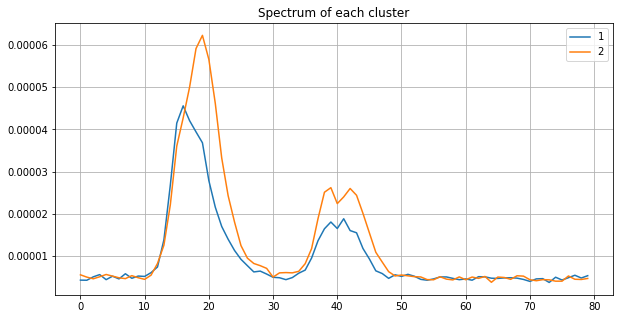

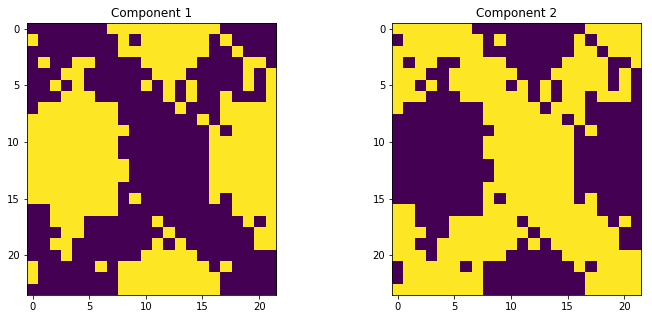

In [3]:
n_clusters = 2

#モデルの定義
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
#クラスタリング（アルゴリズムの実行）
kmeans.fit(X) 
#クラスタリングの結果を取り出す
S = kmeans.cluster_centers_   #成分スペクトル
c = kmeans.labels_  #クラスタ割当

#成分毎のスペクトルの描画
plt.figure(figsize=(10,5))
for k in range(n_clusters):
    plt.plot(S[k,:],label=str(k+1))
plt.grid()
plt.legend()
plt.title('Spectrum of each cluster')
plt.show()

#成分の空間分布
plt.figure(figsize=(12,5))
for k in range(n_clusters):
    plt.subplot(1,n_clusters, k+1)
    C = np.array(c==k).reshape(xdim,ydim)
    plt.imshow(C)
    plt.title('Component ' + str(k+1))
plt.show()

# 主成分分析

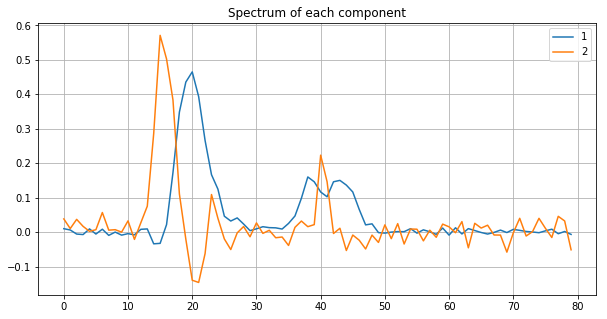

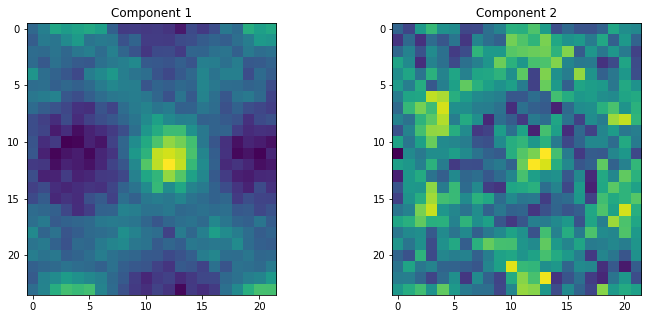

In [4]:
n_components = 2

#モデルの定義
pca = PCA(n_components=n_components)
#学習
pca.fit(X)

#成分スペクトル
S = pca.components_
#成分の強度
D = pca.explained_variance_ratio_
#成分の空間分布
C = pca.transform(X)

#成分毎のスペクトルの描画
plt.figure(figsize=(10,5))
for k in range(n_components):
    plt.plot(S[k,:],label=str(k+1))
plt.grid()
plt.legend()
plt.title('Spectrum of each component')
plt.show()

#成分の空間分布
plt.figure(figsize=(12,5))
for k in range(n_components):
    plt.subplot(1,n_components, k+1)
    c = C[:,k].reshape(xdim,ydim)
    plt.imshow(c*D[k])
    plt.title('Component ' + str(k+1))
plt.show()

# 非負値行列分解

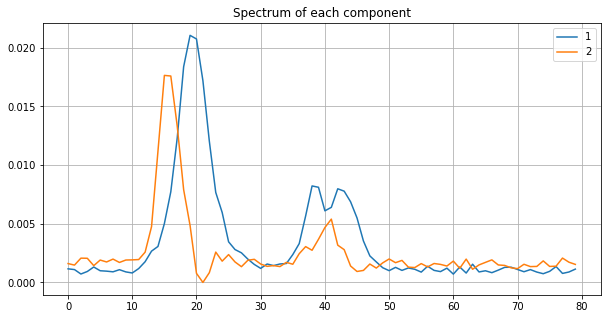

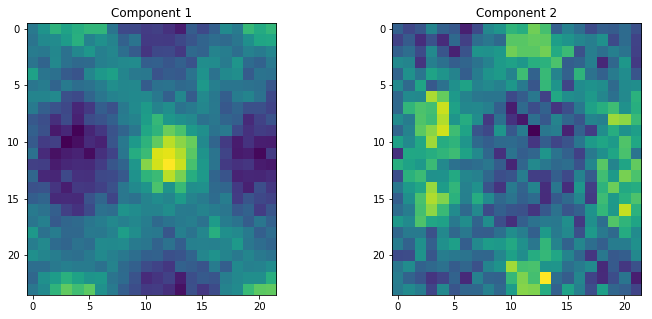

In [5]:
n_components = 2

#モデルの定義
nmf = NMF(n_components=n_components)
#学習
nmf.fit(X)


#成分スペクトル
S = nmf.components_
#成分の空間分布
C = nmf.transform(X)

#成分毎のスペクトルの描画
plt.figure(figsize=(10,5))
for k in range(n_components):
    plt.plot(S[k,:],label=str(k+1))
plt.grid()
plt.legend()
plt.title('Spectrum of each component')
plt.show()

#成分の空間分布
plt.figure(figsize=(12,5))
for k in range(n_components):
    plt.subplot(1,n_components, k+1)
    c = C[:,k].reshape(xdim,ydim)
    plt.imshow(c)
    plt.title('Component ' + str(k+1))
plt.show()

# 独立成分解析

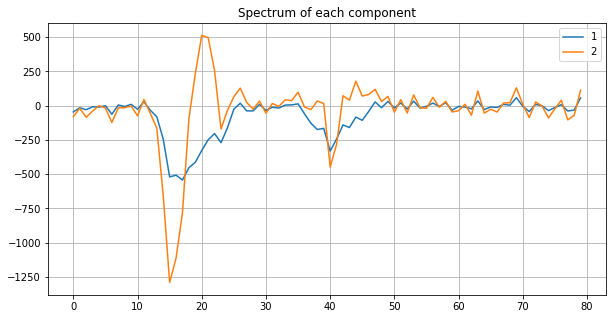

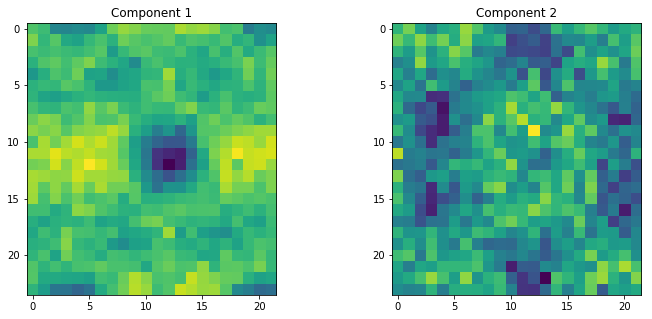

In [6]:
n_components = 2

#モデルの定義
ica = FastICA(n_components=n_components)
#学習
ica.fit(X)

#成分スペクトル
S = ica.components_
#成分の空間分布
C = ica.transform(X)

#成分毎のスペクトルの描画
plt.figure(figsize=(10,5))
for k in range(n_components):
    plt.plot(S[k,:],label=str(k+1))
plt.grid()
plt.legend()
plt.title('Spectrum of each component')
plt.show()

#成分の空間分布
plt.figure(figsize=(12,5))
for k in range(n_components):
    plt.subplot(1,n_components, k+1)
    c = C[:,k].reshape(xdim,ydim)
    plt.imshow(c)
    plt.title('Component ' + str(k+1))
plt.show()